# Random Matrices

> A matrix is interesting only in those ways it fails to look like a random matrix.


A random matrix is a matrix whose entries are random, i.e., random draws from some distribution(s). More precisely, the entries of a random matrix are random variables, which means their values are determined probabilistically.

You would expect that a random matrix must no covariance structure, because it is random. In fact, random matrices have a covariance structure described by the Marchenko-Pastur distribution.

In this lecture, we start with the maths, and then we look at a random matrix example that arises in finance. Finally, we illustrate a denoising technique based on a medical imaging example. 

A useful reference on the topic and the importance of random matrix in machine learning are: 

- https://random-matrix-learning.github.io/. 

- [Random Matrix Methods for Machine Learning, Couillet & Liao (2023)](https://zhenyu-liao.github.io/pdf/RMT4ML.pdf)

For a connection between random matrices results in spin glasses and machine learning see:

- [The Loss Surfaces of Multilayer Networks,  Choromanska et al. (2014)](https://arxiv.org/abs/1412.0233)

For insights from both physics and finance, see: 

- [A First Course in Random Matrix Theory, Potters & Bouchaud (2020)](https://www.cambridge.org/core/books/first-course-in-random-matrix-theory/2292A554A9BB9E2A4697C35BCE920304) 



## Wigner Semicircle Law


Consider a matrix $M$ belonging to the **Gaussian Orthogonal Ensemble (GOE)**. 

Such a matrix $M$ can be a real symmetric $n \times n$ matrix with i.i.d. entries $M_{ij}$ drawn from a normal distribution with mean 0 and variance 1. 

Let us compute such a matrix.    

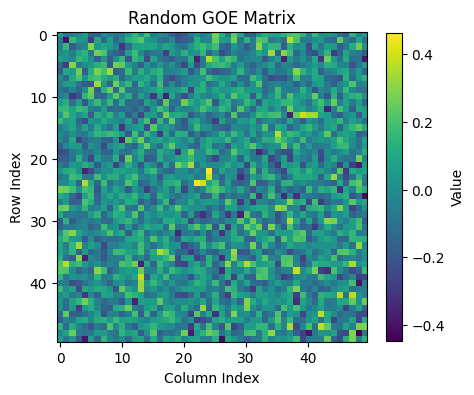

In [5]:
import numpy as np
import matplotlib.pyplot as plt
n = 50
A = np.random.randn(n, n)
M = (A + A.T) / np.sqrt(2 * n)

plt.figure(figsize=(5,5))
plt.imshow(M, cmap='viridis')
plt.colorbar(label='Value', shrink=0.8)
plt.title('Random GOE Matrix')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()




We compute the eigenvalues of $M$, i.e., $\lambda_1, \ldots, \lambda_n$ such that $M v_i = \lambda_i v_i$ for $i=1,\ldots, n$, where $v_1, \ldots, v_n$ are the eigenvectors of $M$. 




In [9]:
lambdas = np.linalg.eigvalsh(M)
len(lambdas)

50

In [11]:
lambdas

array([-1.78831596, -1.66285061, -1.60735989, -1.478767  , -1.37076632,
       -1.28266936, -1.26073123, -1.17522307, -1.15078943, -1.0505597 ,
       -0.87587328, -0.82994073, -0.81216264, -0.69627856, -0.63556949,
       -0.60146074, -0.5174084 , -0.49149304, -0.42805175, -0.34783377,
       -0.30842303, -0.18600724, -0.16910437, -0.0798577 , -0.06882297,
       -0.03037273,  0.10134173,  0.12347385,  0.19636835,  0.33194403,
        0.39814771,  0.40461385,  0.48102878,  0.5181245 ,  0.57489408,
        0.60581731,  0.74318659,  0.74941497,  0.83245446,  0.99281742,
        1.04225235,  1.06837886,  1.18588169,  1.2323374 ,  1.40538206,
        1.46164366,  1.54461226,  1.65577622,  1.73020455,  1.8206828 ])

`lambdas` is an array of length `n` containing the eigenvalues of $M$.  We can present the eigenvalues in a histogram. This histogram is sometimes referred to as the **empirical eigenvalue distribution**.

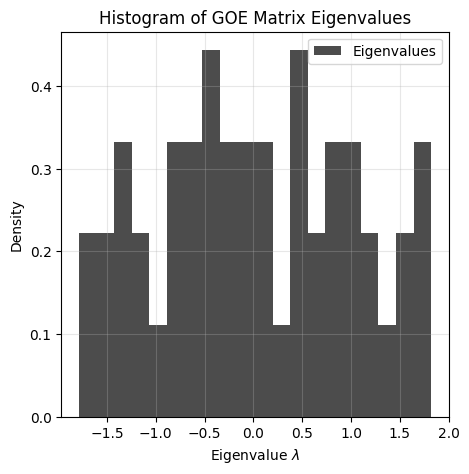

In [12]:
plt.figure(figsize=(5,5))
plt.hist(lambdas, bins=20, density=True, alpha=0.7, color='black', label='Eigenvalues')
plt.title('Histogram of GOE Matrix Eigenvalues')
plt.xlabel(r'Eigenvalue $\lambda$')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Let us now consider the limiting case as $n \to \infty$. 

For instance, pick $n=1000$. 

In [13]:
%%time
n = 1000
A = np.random.randn(n, n)
M = (A + A.T) / np.sqrt(2 * n)
lambdas = np.linalg.eigvalsh(M)

CPU times: user 161 ms, sys: 38.9 ms, total: 200 ms
Wall time: 164 ms


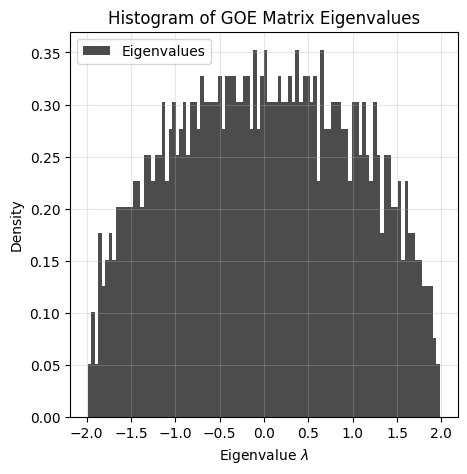

In [14]:
plt.figure(figsize=(5,5))
plt.hist(lambdas, bins=100, density=True, alpha=0.7, color='black', label='Eigenvalues')
plt.title('Histogram of GOE Matrix Eigenvalues')
plt.xlabel(r'Eigenvalue $\lambda$')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

n = 10000, so the matrix is 10000 by 10000

In [4]:
%%time
n = 10000
A = np.random.randn(n, n)
M = (A + A.T) / np.sqrt(2 * n)
lambdas = np.linalg.eigvalsh(M)


CPU times: user 6min 38s, sys: 42.3 s, total: 7min 21s
Wall time: 4min 18s


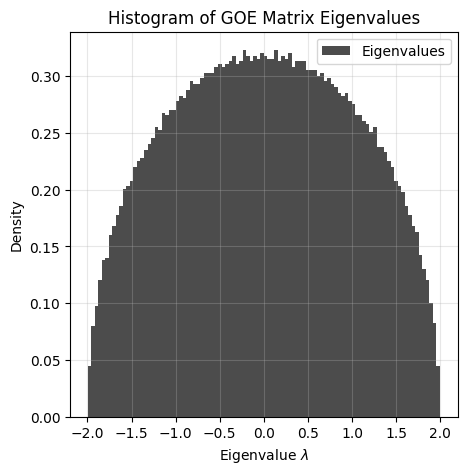

In [6]:
plt.figure(figsize=(5,5))
plt.hist(lambdas, bins=100, density=True, alpha=0.7, color='black', label='Eigenvalues')
plt.title('Histogram of GOE Matrix Eigenvalues')
plt.xlabel(r'Eigenvalue $\lambda$')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


The histogram converges to a semicircle. The eigenvalues are distributed according to the **Wigner semicircle distribution**:

$$
\rho(\lambda) = \frac{2}{\pi R^2} \sqrt{ R^2 - \lambda^2} \quad \text{for} \quad \lambda \in [-R, R].
$$

Here with $R=2$.

Note that if the standard deviation of the normal distribution is $\sigma$, then the semicircle radius is $R = 2 \sigma$.


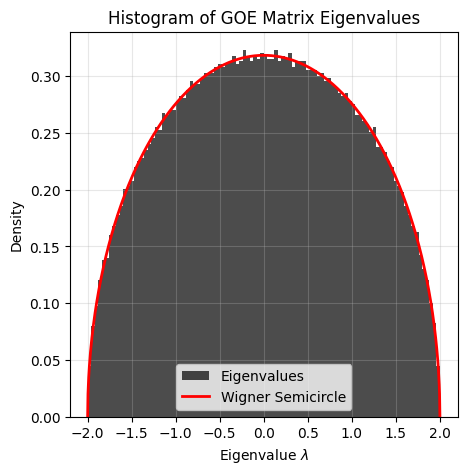

In [7]:
plt.figure(figsize=(5,5))
plt.hist(lambdas, bins=100, density=True, alpha=0.7, color='black', label='Eigenvalues')

x = np.linspace(-2, 2, 1000)
y = 2/(np.pi*4) * np.sqrt(4 - x**2)  # R=2 case
plt.plot(x, y, 'r-', label='Wigner Semicircle', lw=2)

plt.title('Histogram of GOE Matrix Eigenvalues')
plt.xlabel(r'Eigenvalue $\lambda$')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

This property was discovered by Eugene Wigner in the 1950s, working on nuclear physics (more precisely the spaces between the energy levels of heavy nuclei). See [Wigner surmise](https://en.wikipedia.org/wiki/Wigner_surmise) for more details.

Wigner's insight was as follows:

> Perhaps I am now too courageous when I try to guess the distribution of the distances between successive levels (of energies of heavy nuclei). Theoretically, the situation is quite simple if one attacks the problem in a simpleminded fashion. The question is simply what are the distances of the characteristic values of a symmetric matrix with random coefficients. (Wigner, 1956)

## Wishart Matrices

This ensemble of matrices is called the **Wishart Ensemble** and named after the British statistician [John Wishart](https://en.wikipedia.org/wiki/John_Wishart_(statistician)). 

### Sample Covariance Matrices

Consider $T$ observations $\mathbf{x}_1, \ldots, \mathbf{x}_T$, with $\mathbf{x}_t \in \mathbb{R}^N$. 

The **sample covariance matrix** (SCM) is defined as:

$$
\mathbf{E} = \frac{1}{T} \sum_{t=1}^T \mathbf{x}_t \mathbf{x}_t^T.
$$

It is of size $N \times N$. With $\mathbf{H}$ the matrix of observations (the *data matrix*), i.e., $\mathbf{H} = [\mathbf{x}_1, \ldots, \mathbf{x}_T]$ of size $N \times T$, we can write:

$$
\mathbf{E} = \frac{1}{T} \mathbf{H} \mathbf{H}^T.
$$

You can show that $\mathbf{E}$ is symmetric and positive semidefinite, and therefore all its eigenvalues are real and non-negative: $\lambda_1, \ldots, \lambda_N \geq 0$.

### Wishart Ensemble

When the entries of $\mathbf{H}$ are i.i.d. normal random variables, then $\mathbf{E}$ is a **Wishart matrix** belonging to the **Wishart Ensemble**. Moreover, the probability distribution defined over the space of $\mathbf{E}$'s is known as the **Wishart distribution**.


An important parameter to characterize these matrices is the ratio $q = N/T$. 

When $q \to 0$, the number of observations $T$ is much larger than the number of features $N$, and one can faithfully reconstruct the true covariance matrix from the SCM.

But when $q=\mathcal{O}(1)$, the number of observations is of the same order as the number of features, and the SCM is very distorted version of the true covariance matrix.


Let us fix $q=1/2$ and look at the histogram of the eigenvalues of a Wishart matrix, as we increase the number of observations $T$.



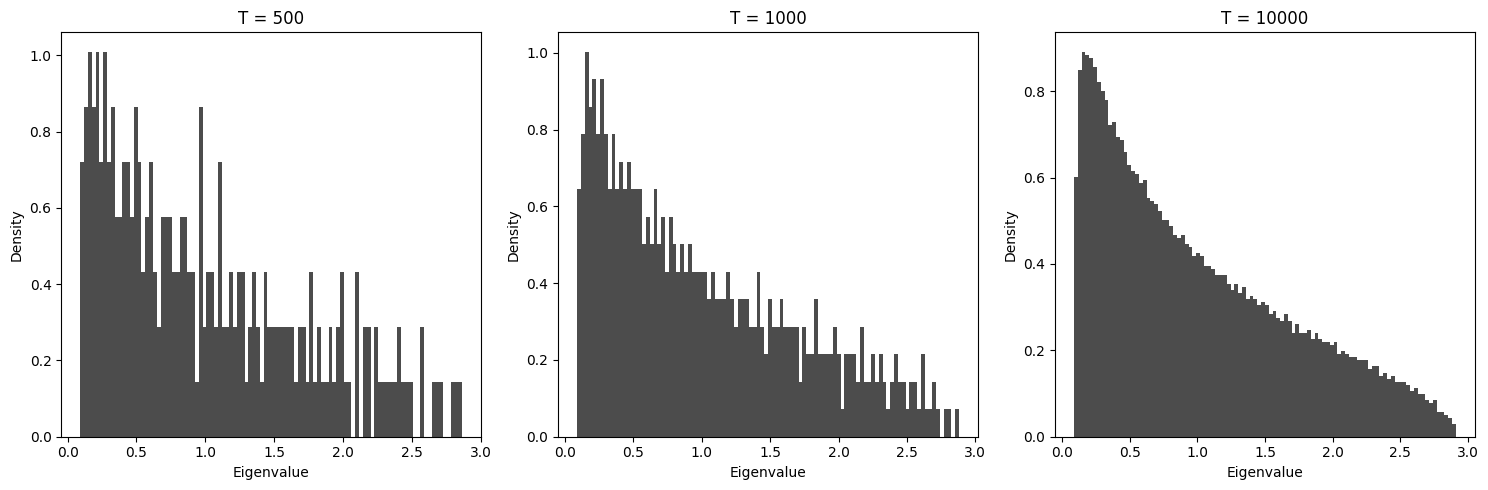

In [1]:
import numpy as np
import matplotlib.pyplot as plt

q = 1 / 2
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Larger figure size for better spacing

# Define the different values of T to loop over
Ts = [500, 1000, 10000]

for i, T in enumerate(Ts):
    N = int(q * T)
    H = np.random.randn(N, T)
    E = H @ H.T / T
    lambdas = np.linalg.eigvalsh(E)

    # Plot the histogram of eigenvalues
    ax[i].hist(lambdas, bins=100, density=True, alpha=0.7, color='black')
    ax[i].set_title(f'T = {T}', fontsize=12)
    ax[i].set_xlabel('Eigenvalue', fontsize=10)
    ax[i].set_ylabel('Density', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


We see that for large $T$ the histogram converges to a seemingly continuous distribution.


## Marchenko Pastur Distribution


The Marchenko Pastur distribution is a distribution of eigenvalues. The formula is:

$$
\rho(\lambda) = \frac{1}{2 \pi q \lambda} \sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)} \quad \text{for} \quad \lambda \in [\lambda_+, \lambda_-],
$$

where $\lambda_+, \lambda_-$ are given by:

$$
\lambda_\pm = (1 \pm \sqrt{q})^2.
$$


### Marchenko Pastur Law

The Marchenko Pastur law implies that when both $N$ and $T$ are large, the empirical eigenvalue distribution of Wishart matrices converges to the Marchenko Pastur distribution with $q=N/T$.


We can verify this with our previous example where we fixed $q=1/2$.



In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
q = 1 / 2
T = 10000
N = int(q * T)

# Generate the random matrix and compute eigenvalues
H = np.random.randn(N, T)
E = H @ H.T / T
lambdas = np.linalg.eigvalsh(E)

# Calculate Marchenko-Pastur distribution
lambda_minus = (1 - np.sqrt(q))**2
lambda_plus = (1 + np.sqrt(q))**2
x = np.linspace(lambda_minus, lambda_plus, 500)
mp_density = (1 / (2 * np.pi * q * x)) * np.sqrt((lambda_plus - x) * (x - lambda_minus))
mp_density = np.where((x >= lambda_minus) & (x <= lambda_plus), mp_density, 0)  # Set density to 0 outside the range


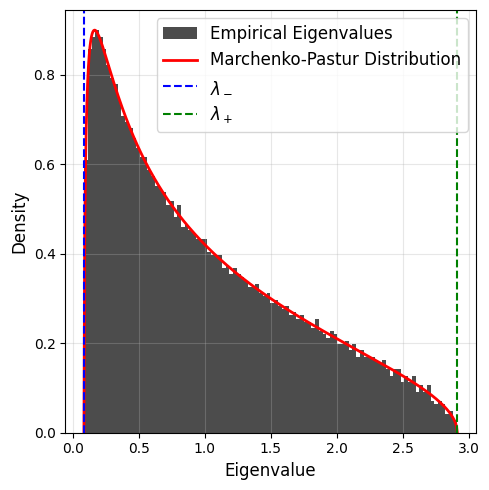

In [6]:
# Plotting
plt.figure(figsize=(5, 5))
plt.hist(lambdas, bins=100, density=True, alpha=0.7, color='black', label='Empirical Eigenvalues')
plt.plot(x, mp_density, color='red', linewidth=2, label='Marchenko-Pastur Distribution')
plt.axvline(lambda_minus, color='blue', linestyle='--', label=r'$\lambda_-$')
plt.axvline(lambda_plus, color='green', linestyle='--', label=r'$\lambda_+$')

# Labels and legend
# plt.title(f'Eigenvalue Distribution and Marchenko-Pastur Law (T={T})', fontsize=14)
plt.xlabel('Eigenvalue', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Let us now look at different values of $q$.


**Case q=2:**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
q = 2
T = 5000
N = int(q * T)

# Generate the random matrix and compute eigenvalues
H = np.random.randn(N, T)
E = H @ H.T / T
lambdas = np.linalg.eigvalsh(E)

# Calculate Marchenko-Pastur distribution
lambda_minus = (1 - np.sqrt(q))**2
lambda_plus = (1 + np.sqrt(q))**2
x = np.linspace(lambda_minus, lambda_plus, 500)
mp_density = (1 / (2 * np.pi * q * x)) * np.sqrt((lambda_plus - x) * (x - lambda_minus))
mp_density = np.where((x >= lambda_minus) & (x <= lambda_plus), mp_density, 0)  # Set density to 0 outside the range


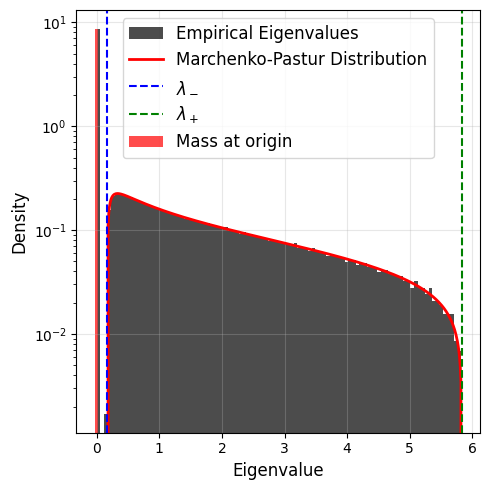

In [23]:

# Plotting
plt.figure(figsize=(5, 5))
hist_vals, bins, _ = plt.hist(lambdas, bins=100, density=True, alpha=0.7, color='black', label='Empirical Eigenvalues')
plt.plot(x, mp_density, color='red', linewidth=2, label='Marchenko-Pastur Distribution')
plt.axvline(lambda_minus, color='blue', linestyle='--', label=r'$\lambda_-$')
plt.axvline(lambda_plus, color='green', linestyle='--', label=r'$\lambda_+$')


zero_mass = (q - 1) / q  # Amplitude of delta function at zero
bin_width = bins[1] - bins[0]
plt.bar(0, zero_mass/bin_width, width=bin_width, color='red', alpha=0.7, label=r'Mass at origin')

plt.yscale('log')
# Labels and legend
# plt.title(f'Eigenvalue Distribution and Marchenko-Pastur Law (T={T}, q={q})', fontsize=14)
plt.xlabel('Eigenvalue', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



When $q>1$, the Marchenko Pastur distribution has a mass at the origin, its amplitude is given by $(q-1)/q$ (times a Dirac delta function).


**Case q=1:**


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
q = 1
T = 5000
N = int(q * T)

# Generate the random matrix and compute eigenvalues
H = np.random.randn(N, T)
E = H @ H.T / T
lambdas = np.linalg.eigvalsh(E)

# Calculate Marchenko-Pastur distribution
lambda_minus = (1 - np.sqrt(q))**2
lambda_plus = (1 + np.sqrt(q))**2
x = np.linspace(lambda_minus, lambda_plus, 500)
mp_density = (1 / (2 * np.pi * q * x)) * np.sqrt((lambda_plus - x) * (x - lambda_minus))
mp_density = np.where((x >= lambda_minus) & (x <= lambda_plus), mp_density, 0)  # Set density to 0 outside the range

/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_61003/3342109622.py:18: RuntimeWarning: divide by zero encountered in divide
  mp_density = (1 / (2 * np.pi * q * x)) * np.sqrt((lambda_plus - x) * (x - lambda_minus))
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_61003/3342109622.py:18: RuntimeWarning: invalid value encountered in multiply
  mp_density = (1 / (2 * np.pi * q * x)) * np.sqrt((lambda_plus - x) * (x - lambda_minus))


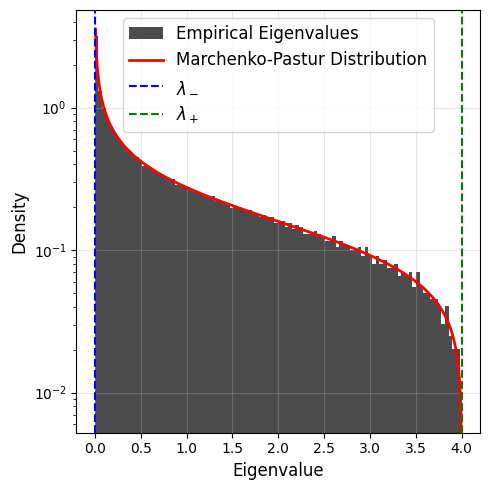

In [25]:

# Plotting
plt.figure(figsize=(5, 5))
hist_vals, bins, _ = plt.hist(lambdas, bins=100, density=True, alpha=0.7, color='black', label='Empirical Eigenvalues')
plt.plot(x, mp_density, color='red', linewidth=2, label='Marchenko-Pastur Distribution')
plt.axvline(lambda_minus, color='blue', linestyle='--', label=r'$\lambda_-$')
plt.axvline(lambda_plus, color='green', linestyle='--', label=r'$\lambda_+$')


plt.yscale('log')
# Labels and legend
# plt.title(f'Eigenvalue Distribution and Marchenko-Pastur Law (T={T}, q={q})', fontsize=14)
plt.xlabel('Eigenvalue', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


When $q=1$, the Marchenko Pastur distribution has a singularity at the origin. It diverges as $\sim 1/\sqrt{\lambda}$. In fact, in this case, the matrix $\mathbf{H}$ is a Wigner matrix with its eigenvalues distributed according to the Wigner semicircle distribution, and the corresponding distribution of the square of these eigenvalues (i.e., the eigenvalues of $\mathbf{E}$) is distributed according to the distribution illustrated above.


### Non-unit variance

When the variance of the entries of $\mathbf{H}$ is not 1, the Marchenko Pastur distribution is given by:

$$
\rho(\lambda) = \frac{1}{2 \pi q \lambda \sigma^2} \sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)} \quad \text{for} \quad \lambda \in [\lambda_+, \lambda_-],
$$

where $\lambda_\pm = (1 \pm \sqrt{q})^2 \sigma^2$.


### Universality

In fact, the Marchenko Pastur distribution is universal in the sense that it does not depend on the specific distribution of the entries of $\mathbf{H}$. 

The theorem is due to [Marchenko and Pastur (1967)](https://iopscience.iop.org/article/10.1070/SM1967v001n04ABEH001994) and it states that:  

> Let $\mathbf{H}$ be an $N \times T$ random matrix with i.i.d. entries $x_{ij}$ that verify:
> 
> $$
>  \mathbb{E}[x_{ij}] = 0, \quad \mathbb{E}[x_{ij}^2] = 1 \quad \text{and} \quad \mathbb{E}[x_{ij}^4] < \infty.
> $$
> 
> Then  when $N, T \to \infty$, the empirical eigenvalue distribution of $\mathbf{E} = \frac{1}{T} \mathbf{H} \mathbf{H}^T$ converges to the Marchenko Pastur distribution  with $q=N/T$.

Thus, the entries do not need to be Gaussian, as long as the above moment conditions are verified.


The most important feature predicted by the Marchenko Pastur law is that the eigenvalues live in a finite, well defined interval.

The Marchenko Pastur law is an extremely important result, with applications that continue to be discovered. With this result, random matrix theory took a new dimension. 


## Application to Finance

Understanding correlations between stocks is maybe the most important problem in finance. Thus, measuring or estimating correlations between stock prices is crucial. This generally underlies risk management and portfolio allocation strategies.

The question every analyst wants to answer is: *Given a set of financial assets (say a set of stocks), characterized by their average returns and risk (i.e., volatility), what is the optimal weight for each asset such that the portfolio provides the best return for a fixed level of risk?*  

This question can not be answered without a reliable determination of the stock correlation matrix. 

For $N$ stocks, the correlation matrix is of size $N \times N$ and has $N(N-1)/2$ free parameters. It has to be determined from $N$ time series of length $T$.

For instance, for $N=400$ stocks of the S&P 500 index this means $\approx 80,000$ parameters to estimate. Say we have 4 years of data, i.e., $N$ time series of length $T=252 \times 4 = 1008$ trading days. In this case, $T$ is not very large compared to $N$, and the estimation of the correlation matrix ought to be noisy, i.e, random to a large extent. In this case, the structure of the correlation matrix is actually dominated by noise. 

In principle, the eigenvectors of the correlation matrix that correspond to the smallest eigenvalues are the ones that we should use to construct the portfolio that maximizes the return-to-risk ratio. However, these eigenvectors are also the most affected by noise. Therefore, it is important to separate the signal (eigenvectors that have real information) from the noise.

### Correlation of S&P 500 components

Let us load the daily returns of the S&P 500 components.


In [2]:
import pandas as pd
link = (
    "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks"
)
df = pd.read_html(link, header=0)[0]

In [3]:
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
sym_str = []
for sym in df.Symbol:
    # if sym == 'BRK.B': ## some errors with this ticker
    #     continue
    sym_str.append(sym)     

In [5]:
# np.where(np.array(sym_str) == 'BRK.B')

In [6]:
%%time
import yfinance as yf
df = yf.download(sym_str, 
                 start="2000-01-01",
                 end="2005-11-30")

[*********************100%***********************]  503 of 503 completed

102 Failed downloads:
['OTIS', 'PLTR', 'DAL', 'CZR', 'LULU', 'UBER', 'PODD', 'KVUE', 'NXPI', 'DG', 'MPC', 'MRNA', 'V', 'FTV', 'VICI', 'VLTO', 'NCLH', 'QRVO', 'DELL', 'FTNT', 'CTVA', 'ABNB', 'ENPH', 'SW', 'PAYC', 'LDOS', 'PYPL', 'GEHC', 'FOXA', 'HCA', 'KEYS', 'IR', 'APTV', 'FOX', 'VRSK', 'KHC', 'GEV', 'EPAM', 'CARR', 'CHTR', 'KMI', 'KDP', 'CPAY', 'FANG', 'TEL', 'BX', 'CEG', 'AMCR', 'ABBV', 'CFG', 'LYV', 'VST', 'HLT', 'IQV', 'ZTS', 'MA', 'PSX', 'LW', 'NWSA', 'HPE', 'GNRC', 'PARA', 'TSLA', 'CMG', 'CBOE', 'AMTM', 'DAY', 'PM', 'XYL', 'MSCI', 'AVGO', 'CTLT', 'HWM', 'KKR', 'GM', 'LYB', 'AWK', 'DFS', 'INVH', 'PANW', 'META', 'FSLR', 'CDW', 'DOW', 'BR', 'TRGP', 'SYF', 'CRWD', 'GDDY', 'TDG', 'UAL', 'HII', 'NWS', 'TMUS', 'ALLE', 'SOLV', 'NOW', 'ANET', 'ULTA', 'SMCI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2000-01-01 -> 2005-11-30) (Yahoo error = "Data doesn\'t exist for startDate = 9467

CPU times: user 10.9 s, sys: 1.43 s, total: 12.3 s
Wall time: 45.3 s


In [7]:
df

Price                      Adj Close                                           \
Ticker                             A      AAPL ABBV ABNB        ABT      ACGL   
Date                                                                            
2000-01-03 00:00:00+00:00  43.463020  0.843077  NaN  NaN   8.288178  1.215037   
2000-01-04 00:00:00+00:00  40.142929  0.771997  NaN  NaN   8.051378  1.208433   
2000-01-05 00:00:00+00:00  37.652863  0.783293  NaN  NaN   8.036577  1.320692   
2000-01-06 00:00:00+00:00  36.219181  0.715509  NaN  NaN   8.317783  1.307485   
2000-01-07 00:00:00+00:00  39.237442  0.749401  NaN  NaN   8.406582  1.380124   
...                              ...       ...  ...  ...        ...       ...   
2005-11-22 00:00:00+00:00  21.471949  2.004027  NaN  NaN  12.146412  5.756105   
2005-11-23 00:00:00+00:00  21.520235  2.021802  NaN  NaN  12.044474  5.811047   
2005-11-25 00:00:00+00:00  21.544378  2.088985  NaN  NaN  12.041378  5.782519   
2005-11-28 00:00:00+00:00  21.520235  2.098625  NaN  NaN  12.032114  5.689543   
2005-11-29 00:00:00+00:00  21.423653  2.051627  NaN  NaN  11.788074  5.592340   

Price                                                                  ...  \
Ticker                           ACN       ADBE        ADI        ADM  ...   
Date                                                                   ...   
2000-01-03 00:00:00+00:00        NaN  16.274673  28.214649   6.248421  ...   
2000-01-04 00:00:00+00:00        NaN  14.909400  26.787292   6.183335  ...   
2000-01-05 00:00:00+00:00        NaN  15.204174  27.178352   6.085704  ...   
2000-01-06 00:00:00+00:00        NaN  15.328291  26.435350   6.118246  ...   
2000-01-07 00:00:00+00:00        NaN  16.072981  27.178352   6.215880  ...   
...                              ...        ...        ...        ...  ...   
2005-11-22 00:00:00+00:00  19.911514  33.459999  24.157951  15.514473  ...   
2005-11-23 00:00:00+00:00  19.681894  33.860001  23.992666  15.584385  ...   
2005-11-25 00:00:00+00:00  20.019140  33.910000  24.170670  15.584385  ...   
2005-11-28 00:00:00+00:00  19.875635  33.209999  23.642996  15.419132  ...   
2005-11-29 00:00:00+00:00  20.263098  32.400002  23.687513  15.406424  ...   

Price                        Volume                                         \
Ticker                          WTW       WY       WYNN      XEL       XOM   
Date                                                                         
2000-01-03 00:00:00+00:00       NaN   973700        NaN  2738600  13458200   
2000-01-04 00:00:00+00:00       NaN  1201700        NaN   425200  14510800   
2000-01-05 00:00:00+00:00       NaN  1184600        NaN   500200  17485000   
2000-01-06 00:00:00+00:00       NaN  1307700        NaN   344100  19461600   
2000-01-07 00:00:00+00:00       NaN  1728000        NaN   469500  16603800   
...                             ...      ...        ...      ...       ...   
2005-11-22 00:00:00+00:00  408757.0  1194300  1844900.0  1165200  17084900   
2005-11-23 00:00:00+00:00  269573.0   583400  1241600.0   956500  12535100   
2005-11-25 00:00:00+00:00   71385.0   387000   248400.0   278900   6692600   
2005-11-28 00:00:00+00:00  249716.0   866800  1201400.0   961600  15008400   
2005-11-29 00:00:00+00:00  484219.0  1447800  1319400.0  1213900  18592400   

Price                                                           
Ticker                    XYL      YUM        ZBH     ZBRA ZTS  
Date                                                            
2000-01-03 00:00:00+00:00 NaN  3033493        NaN  1055700 NaN  
2000-01-04 00:00:00+00:00 NaN  3315031        NaN   522450 NaN  
2000-01-05 00:00:00+00:00 NaN  4642602        NaN   612225 NaN  
2000-01-06 00:00:00+00:00 NaN  3947658        NaN   263925 NaN  
2000-01-07 00:00:00+00:00 NaN  6063647        NaN   333900 NaN  
...                        ..      ...        ...      ...  ..  
2005-11-22 00:00:00+00:00 NaN  4531322  2415350.0   460300 NaN  
2005-11-23 00:00:00+00:00 NaN

In [8]:
df = df.Close


In [10]:
df = df.dropna(axis=1)

In [11]:
df.describe()

Ticker,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,...,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,23.861300,0.664605,20.344236,3.293209,22.208247,44.042129,14.695453,36.782113,14.772824,43.275805,...,25.615674,16.373156,17.748793,3.963122,8.042779,56.940855,19.694273,43.131734,10.797933,32.594770
std,14.722275,0.475175,2.607677,1.213181,7.128621,15.386976,4.234437,6.614726,11.025208,5.389743,...,4.202009,10.380676,1.424192,1.900309,2.778387,7.526926,5.790209,7.630408,4.161873,12.469408
min,7.761087,0.234286,13.298689,1.270833,8.350000,18.290001,7.916667,21.610996,4.984375,27.812500,...,13.062500,0.717376,14.163333,0.855967,4.137500,36.687500,5.660000,30.270000,4.268512,15.194444
25%,15.901288,0.340223,18.642854,1.851111,16.902500,35.717500,12.032500,32.202368,7.605000,40.459844,...,23.812500,7.803502,16.697500,2.473251,6.016250,50.782499,16.497500,37.857499,7.712527,22.313195
50%,19.041488,0.420268,20.186284,3.368334,20.655001,40.254999,13.610000,35.152567,9.265313,42.535000,...,26.710000,14.498332,17.751666,3.462058,6.803750,57.750000,18.195001,41.258905,10.334292,27.413333
75%,25.041129,0.969029,22.353882,4.308056,28.640000,47.857500,16.665000,41.784565,18.675000,46.054999,...,28.900000,26.710028,18.686458,5.410370,9.635625,63.500000,25.590625,45.097499,13.588246,43.784167
max,113.733910,2.487857,25.901581,6.255556,41.625000,101.375000,25.320000,54.622288,47.599998,56.290001,...,32.380001,36.435467,22.833332,9.392593,14.915000,74.125000,31.639999,64.980003,19.166067,61.889999


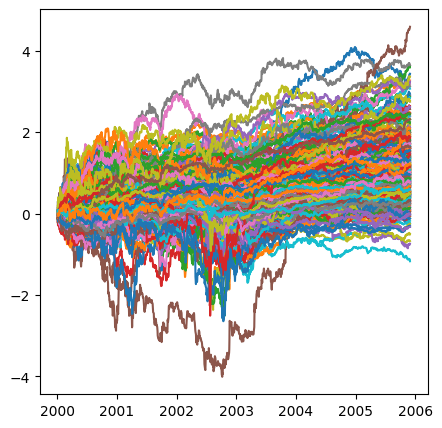

In [101]:
# Compute daily returns
daily_returns = df.pct_change().dropna()

# Compute cumulative returns
cumulative_returns =  daily_returns.cumsum()

# Plot cumulative returns
plt.figure(figsize=(5, 5))
plt.plot(cumulative_returns)
plt.show()

In [78]:
daily_returns.values[-1].shape

(352,)

Text(0.5, 0, 'final returns')

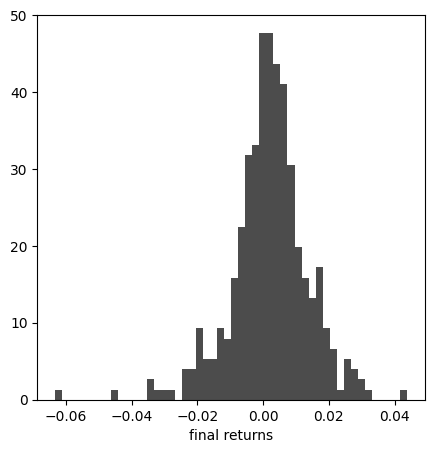

In [84]:
plt.figure(figsize=(5,5))
plt.hist(daily_returns.values[-1],bins=50,density=True,alpha=0.7,color='black');
plt.xlabel("final returns")

In [12]:
from scipy.stats import mode 

tickers = sorted(list(set(df.columns.values)))                   # sorted list of unique tickers  
tkrlens = [len(df[tkr][(df.index>df.index[0]) & (df.index<df.index[-1])]) for tkr in tickers]  # find lengths of times series for each ticker 
tkrmode = mode(tkrlens)[0]


In [13]:
# tkrmode,tkrlens
int(tkrmode)


1484

In [14]:
# idenfity tickers whose lenghts equal the mode and call these good tickers
good_tickers = [tickers[i] for i,tkr in enumerate(tkrlens) if tkrlens[i]==int(tkrmode)]  



In [15]:
len(good_tickers)

352

In [34]:
import numpy as np
import pandas as pd

rtndf = pd.DataFrame()  # initialize a return dataframe
std_lst = [] # list of standard deviations of return time series


# Initialize containers for results
std_lst = []
normalized_returns = []

# Loop through tickers
for tkr in good_tickers: 
    # Select relevant data for the current ticker
    tmpdf = df[tkr][(df.index > df.index[0]) & (df.index < df.index[-1])]
    
    # Compute returns
    tmprtndf = ((tmpdf - tmpdf.shift(1)) / tmpdf).dropna()
    
    # Compute and store standard deviation of returns
    std_lst.append(np.std(tmprtndf))
    
    # Normalize returns to have mean 0 and std 1
    rsdf = (tmprtndf - tmprtndf.mean()) / tmprtndf.std()
    
    # Collect normalized returns
    normalized_returns.append(rsdf)

# Combine all normalized returns into a single DataFrame
rtndf = pd.concat(normalized_returns, axis=1)

# Assign column names for clarity
rtndf.columns = good_tickers



In [35]:
rtndf = rtndf.dropna(axis=1)

In [36]:
rtndf 

,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-05 00:00:00+00:00,-1.652114,0.339111,-0.094890,4.533024,0.494402,0.391044,-0.863298,-0.469242,-2.154160,2.964119,...,0.171534,0.939150,-1.043349,-0.959997,-0.222766,2.522511,1.329485,3.275063,0.217536,0.656975
2000-01-06 00:00:00+00:00,-0.976707,-2.213384,1.784607,-0.590885,0.209925,-0.698878,0.260417,0.668884,-2.079548,-0.320116,...,-0.371835,0.354974,0.568648,2.964085,-0.550886,2.241927,-0.318732,3.113565,-0.420512,-2.002760
2000-01-07 00:00:00+00:00,1.987224,1.059422,0.559123,2.789052,1.173289,0.723180,0.806858,1.120238,3.345925,1.160135,...,-2.088760,0.433407,3.599164,-0.924117,0.529835,-1.686104,0.013379,-0.197399,-1.084342,-0.392793
2000-01-10 00:00:00+00:00,1.483355,-0.416753,-0.371708,1.699401,0.942561,2.075901,-0.019386,1.207366,-0.405292,-0.615250,...,0.179665,-0.267385,-0.928873,-0.586748,1.045775,-0.207362,0.013379,-0.911440,1.788797,1.139295
2000-01-11 00:00:00+00:00,-0.320440,-1.258685,-0.756382,0.447644,-1.854867,-1.075436,-0.858814,-0.971833,-0.877784,-0.169490,...,-0.580316,-0.151340,-0.750856,-0.945843,-1.525405,-0.518909,0.013379,0.178791,-0.337250,0.238076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-11-21 00:00:00+00:00,0.081205,0.145864,-0.689956,0.268425,-0.122601,0.307816,-0.105377,-0.269489,1.524217,0.196095,...,0.317202,0.226646,0.141722,-0.009257,-0.231146,0.531092,-0.314097,1.188517,0.274958,0.759514
2005-11-22 00:00:00+00:00,0.452270,0.550249,-1.405676,-0.284010,0.103800,0.231241,-0.148685,-0.494847,0.940656,0.318441,...,-0.419457,0.374999,0.607321,0.819670,-1.212837,0.224354,0.224016,0.298565,0.197704,0.075627
2005-11-23 00:00:00+00:00,0.087384,0.207454,-0.444021,0.462745,0.303559,-0.154691,0.216604,-0.199132,-0.604925,0.606260,...,-0.173555,-0.370975,0.391365,0.245149,-0.258263,-0.488602,0.560124,0.212561,0.374536,0.067912


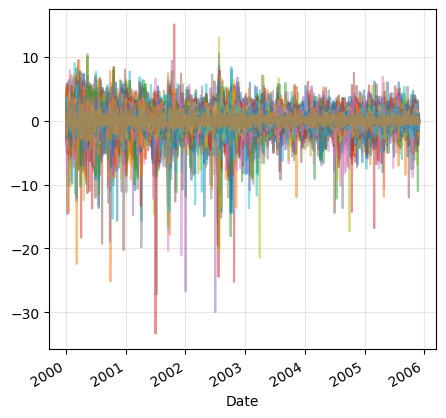

In [102]:
rtndf.plot(figsize=(5,5),alpha=0.5,legend=False);
plt.grid(alpha=0.3);
plt.show();

In [20]:
rtndf.columns = good_tickers
cmat = rtndf.corr()                   # compute correlation matrix 
evls, evcs = np.linalg.eig(cmat)      # compute eigenvalue/vector decomposition of matrix 


In [21]:
N = len(evls)
T = len(rtndf)

q = N/T
Q = 1/q
print(N,T,q,Q)

352 1483 0.23735670937289277 4.213068181818182


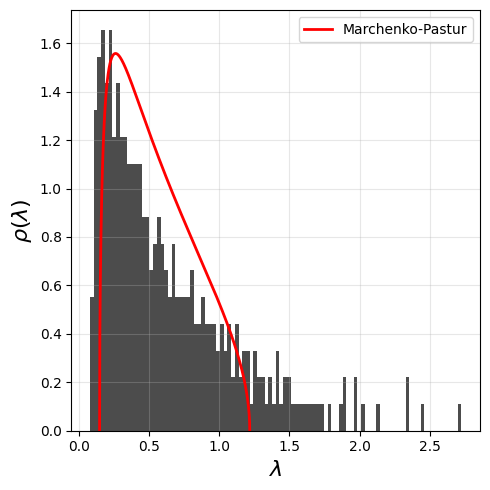

In [33]:
import matplotlib.pyplot as plt
# plt.hist([val for val in evls if val < 1.5],bins=50,density=True);
# Plot Marchenko-Pastur distribution
sig2 = 0.55
lambda_plus = (1 + np.sqrt(q))**2*sig2
lambda_minus = (1 - np.sqrt(q))**2*sig2
x = np.linspace(lambda_minus, lambda_plus, 1000)
mp_density = (1 / (2 * np.pi * q * x * sig2)) * np.sqrt((lambda_plus - x) * (x - lambda_minus))


plt.figure(figsize=(5,5))
plt.plot(x, mp_density, 'r-', lw=2, label='Marchenko-Pastur')

plt.legend()

_ = plt.hist( evls[evls<3] ,bins=100,density=True,color='black',alpha=0.7)
# plt.yscale('log')
plt.xlabel(r"$\lambda$",fontsize=16)
plt.ylabel(r"$\rho(\lambda)$",fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Market simulation

Simulate daily return time series drawn from a heavy tailed distribution. We chose the Student's t distribution with degree of freedom parameter 5.

Let us simulate $N=500$ stocks over $T=2000$ trading days.


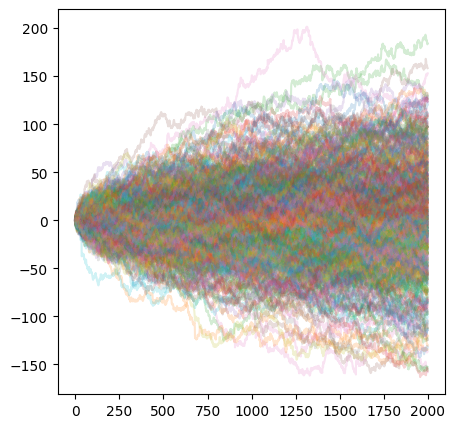

In [100]:

import matplotlib.pyplot as plt
import numpy as np
deg_freedom = 5  # Student's t distribution degree of freedom parameter 
num_srs = 500    # number of time series to generate  
num_pts = 2000   # number of points per time series 
rpaths = np.random.standard_t(deg_freedom,size=(num_pts,num_srs))  # generate paths
evalplot = np.linalg.eig(pd.DataFrame(rpaths).corr())[0]                  # compute eigenvalues

plt.figure(figsize=(5,5))                                           
_ = plt.plot(rpaths.cumsum(axis=0),alpha=0.2)






In [75]:
rpaths[-1].shape

(500,)

Text(0.5, 0, 'final returns')

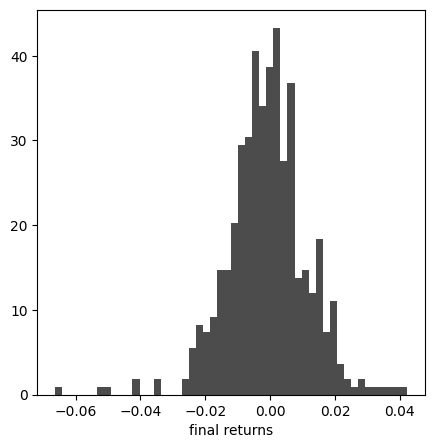

In [80]:
plt.figure(figsize=(5,5))
plt.hist(rpaths[-1]/100,bins=50,density=True,alpha=0.7,color='black');
plt.xlabel("final returns")


4.0


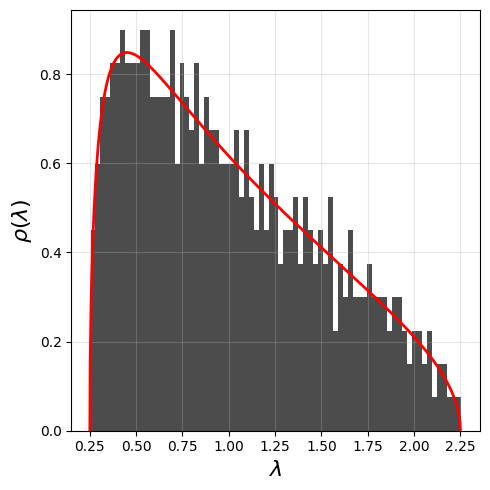

In [90]:
plt.figure(figsize=(5,5))
plt.hist(evalplot,bins=75,density=True,color='black',alpha=0.7);
# Marchenko-Pastur parameters
Q = num_pts / num_srs  # Aspect ratio
print(Q)
lambda_plus = (1 + np.sqrt(1 / Q))**2
lambda_minus = (1 - np.sqrt(1 / Q))**2
x = np.linspace(lambda_minus, lambda_plus, 1000)

def marchenko_pastur_pdf(x, q):
    """Marchenko-Pastur probability density function."""
    return (Q / (2 * np.pi)) * np.sqrt((lambda_plus - x) * (x - lambda_minus)) / x
# Compute Marchenko-Pastur density
mp_pdf = marchenko_pastur_pdf(x, q)
plt.plot(x, mp_pdf, color='red', lw=2, label='Marchenko-Pastur')

plt.xlabel(r"$\lambda$",fontsize=16)
plt.ylabel(r"$\rho(\lambda)$",fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Simulation with market mode



In [93]:
import matplotlib.pyplot as plt
import numpy as np
deg_freedom = 5  # Student's t distribution degree of freedom parameter 
num_srs = 500    # number of time series to generate  
num_pts = 2000   # number of points per time series 
# Generate random paths
rpaths = np.random.standard_t(deg_freedom, size=(num_pts, num_srs))

market_influence = 0.1  # Strength of the market influence

# Generate a market factor (common mode)
market_factor = np.random.normal(0, 1, size=(num_pts, 1))

# Add market influence to each path
rpaths_with_market = rpaths + market_influence * market_factor

# Compute the correlation matrix and its eigenvalues
correlation_matrix = pd.DataFrame(rpaths_with_market).corr()
evalplot = np.linalg.eig(correlation_matrix)[0]  # Eigenvalues


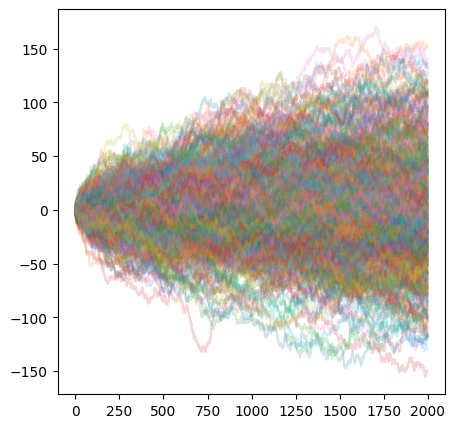

In [98]:
plt.figure(figsize=(5,5))                                           
_ =plt.plot(rpaths_with_market.cumsum(axis=0),alpha=0.2)

4.0


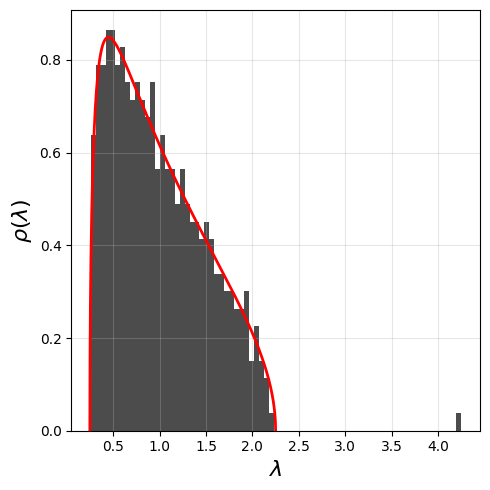

In [95]:
plt.figure(figsize=(5,5))
plt.hist(evalplot,bins=75,density=True,color='black',alpha=0.7);
# Marchenko-Pastur parameters
Q = num_pts / num_srs  # Aspect ratio
print(Q)
lambda_plus = (1 + np.sqrt(1 / Q))**2
lambda_minus = (1 - np.sqrt(1 / Q))**2
x = np.linspace(lambda_minus, lambda_plus, 1000)

def marchenko_pastur_pdf(x, q):
    """Marchenko-Pastur probability density function."""
    return (Q / (2 * np.pi)) * np.sqrt((lambda_plus - x) * (x - lambda_minus)) / x
# Compute Marchenko-Pastur density
mp_pdf = marchenko_pastur_pdf(x, q)
plt.plot(x, mp_pdf, color='red', lw=2, label='Marchenko-Pastur')

plt.xlabel(r"$\lambda$",fontsize=16)
plt.ylabel(r"$\rho(\lambda)$",fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The SP500 correlation looks very much like a Marchenko Pastur distribution, plus some information (or signal). 
To extract the non-noisy part of the stock correlation, we could fit the Marchenko Pastur distribution to the empirical eigenvalues and remove the eigenvalues that are compatible with the Marchenko Pastur distribution.

With this idea, we can *denoise* the correlation matrix, and hope to build robust portfolios. To learn more about this you can read [A First Course in Random Matrix Theory, Potters & Bouchaud (2020)](https://www.cambridge.org/core/books/first-course-in-random-matrix-theory/2292A554A9BB9E2A4697C35BCE920304).

## Application to Medical Imaging

In vivo imaging of the brain tissue has been revolutionized by the development of [diffusion Magnetic Resonance Imaging (dMRI)](https://en.wikipedia.org/wiki/Diffusion-weighted_magnetic_resonance_imaging) and [tractography](https://en.wikipedia.org/wiki/Tractography). Thermal noise corrupts dMRI measurements and propagates to the quality of the reconstructed images, hampering it.

In 2016, Veraart et al. proposed a denoising method based on the Marchenko Pastur distribution, which fast and optimal in the sense that it provides an optimal compromise between noise suppression and loss of anatomical information.  

The method is called the *Marchenko Pastur Principal Component Analysis denoising* algorithm and is implemented in the [DIPY](https://docs.dipy.org/dev/) package. See [here](https://docs.dipy.org/dev/examples_built/preprocessing/denoise_mppca.html).


The idea is to construct a data matrix $\tilde{\mathbf{H}}$ based on the original matrix after nullifying all eigenvalues that are smaller than the $\lambda_+$ predicted by the Marchenko Pastur distribution (i.e., the pure-noise eigenvalues). This is a prametric denoising method, where both the noise level $\sigma^2$ and the number of principal components $P$ are estimated from the data.

The reduction in noise is given by

$$
\sigma_{\text{denoised}}^2 = \frac{P}{N}\sigma^2 
$$
where $P$ is the number of principal components that are retained and $N$ the dimension of the data vector. (The number eigenvalues described by the Marchenko Pastur distribution is $N-P$, they correspond to those that are nulled.)

See [Denoising of diffusion MRI using random matrix theory, Veraart et al. (2016)](https://www.sciencedirect.com/science/article/pii/S1053811916303949) for details. 



## Application to Learning Algorithms

Refer to [Random Matrix Methods for Machine Learning, Couillet & Liao (2023)](https://zhenyu-liao.github.io/pdf/RMT4ML.pdf) and the online ICML tutorial: [Random Matrix Theory and Machine Learning](https://random-matrix-learning.github.io/). 